In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
file_path="D:\heart.csv"
df_heart=pd.read_csv(file_path)
df_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# EDA

In [3]:
df_heart.shape

(918, 12)

In [4]:
df_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df_heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
df_heart.duplicated().sum()

0

In [8]:
df_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df_heart.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [10]:
df_heart.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

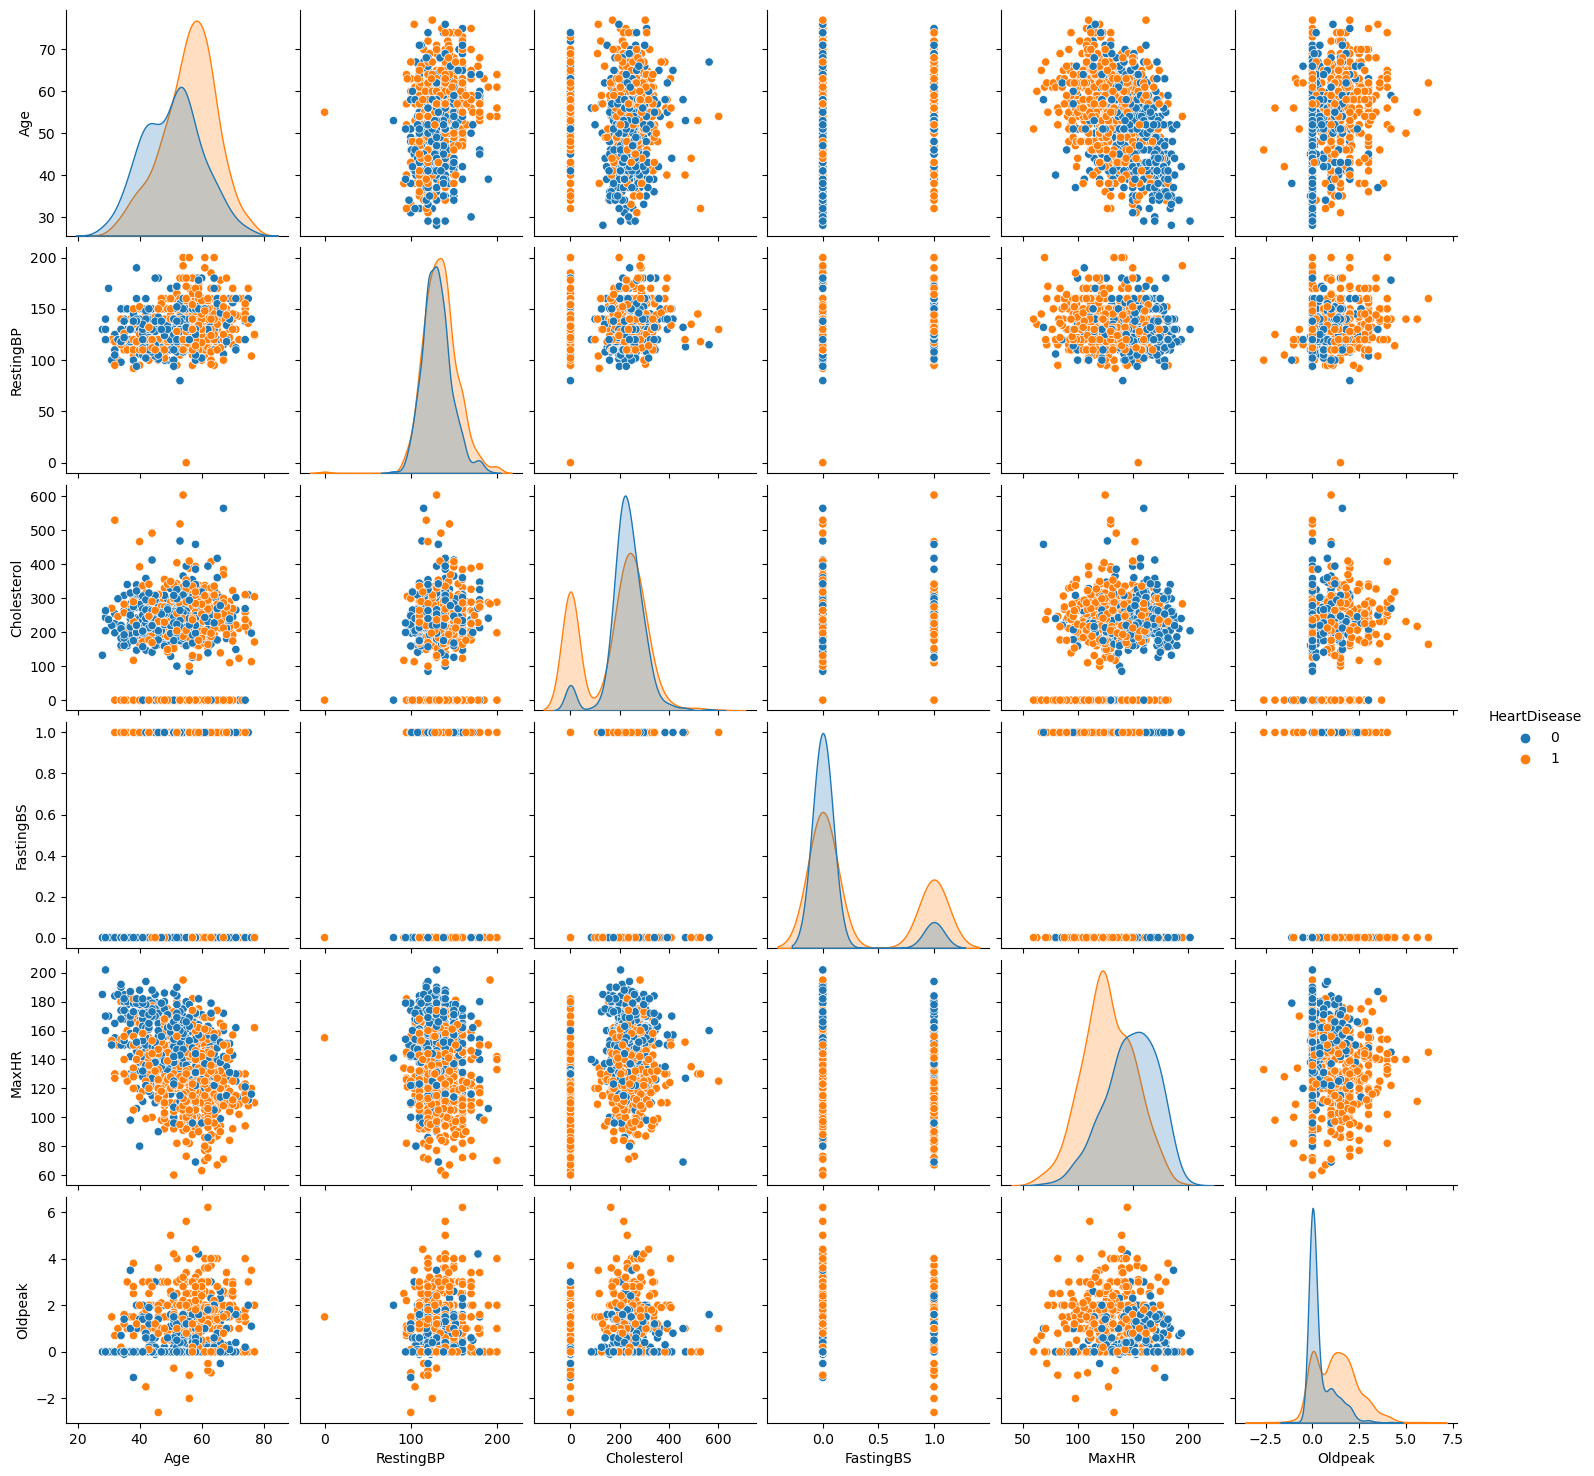

In [11]:
sns.pairplot(df_heart,hue='HeartDisease')

# Encoding

In [12]:
df_heart['Sex'].unique()

array(['M', 'F'], dtype=object)

In [13]:
label_encoder=preprocessing.LabelEncoder()
df_heart['Sex']=label_encoder.fit_transform(df_heart['Sex'])
df_heart['Sex'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: Sex, Length: 918, dtype: int32>

In [14]:
df_heart['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [15]:
label_encoder=preprocessing.LabelEncoder()
df_heart['ExerciseAngina']=label_encoder.fit_transform(df_heart['ExerciseAngina'])
df_heart['ExerciseAngina'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina, Length: 918, dtype: int32>

In [16]:
df_heart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [17]:
df_heart['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [18]:
df_heart['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [19]:
one_hot_encoded_cpt = pd.get_dummies(df_heart,columns=['ChestPainType'],drop_first=True)

one_hot_encoded_cpt.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,0,0.0,Up,0,True,False,False
1,49,0,160,180,0,Normal,156,0,1.0,Flat,1,False,True,False
2,37,1,130,283,0,ST,98,0,0.0,Up,0,True,False,False
3,48,0,138,214,0,Normal,108,1,1.5,Flat,1,False,False,False
4,54,1,150,195,0,Normal,122,0,0.0,Up,0,False,True,False


In [20]:

one_hot_encoded_recg = pd.get_dummies(one_hot_encoded_cpt,columns=['RestingECG'],drop_first=True)

one_hot_encoded_recg.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,Up,0,True,False,False,True,False
1,49,0,160,180,0,156,0,1.0,Flat,1,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,Up,0,True,False,False,False,True
3,48,0,138,214,0,108,1,1.5,Flat,1,False,False,False,True,False
4,54,1,150,195,0,122,0,0.0,Up,0,False,True,False,True,False


In [21]:

one_hot_encoded_exa = pd.get_dummies(one_hot_encoded_recg,columns=['ExerciseAngina'],drop_first=True)

one_hot_encoded_exa.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_1
0,40,1,140,289,0,172,0.0,Up,0,True,False,False,True,False,False
1,49,0,160,180,0,156,1.0,Flat,1,False,True,False,True,False,False
2,37,1,130,283,0,98,0.0,Up,0,True,False,False,False,True,False
3,48,0,138,214,0,108,1.5,Flat,1,False,False,False,True,False,True
4,54,1,150,195,0,122,0.0,Up,0,False,True,False,True,False,False


In [22]:

final_df = pd.get_dummies(one_hot_encoded_exa,columns=['ST_Slope'],drop_first=True)

final_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_1,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,True,False,False,True,False,False,False,True
1,49,0,160,180,0,156,1.0,1,False,True,False,True,False,False,True,False
2,37,1,130,283,0,98,0.0,0,True,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1.5,1,False,False,False,True,False,True,True,False
4,54,1,150,195,0,122,0.0,0,False,True,False,True,False,False,False,True


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int32  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   Oldpeak            918 non-null    float64
 7   HeartDisease       918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_1   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(8), float64(1), in

In [24]:
final_df['ChestPainType_ATA'].unique()

array([ True, False])

In [25]:
label_encoder=preprocessing.LabelEncoder()
final_df['ChestPainType_ATA']=label_encoder.fit_transform(final_df['ChestPainType_ATA'])
final_df['ChestPainType_ATA'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      0
      ..
913    0
914    0
915    0
916    1
917    0
Name: ChestPainType_ATA, Length: 918, dtype: int64>

In [26]:
final_df['ChestPainType_NAP'].unique()

array([False,  True])

In [27]:
label_encoder=preprocessing.LabelEncoder()
final_df['ChestPainType_NAP']=label_encoder.fit_transform(final_df['ChestPainType_NAP'])
final_df['ChestPainType_NAP'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      0
4      1
      ..
913    0
914    0
915    0
916    0
917    1
Name: ChestPainType_NAP, Length: 918, dtype: int64>

In [28]:
final_df['ChestPainType_TA'].unique()

array([False,  True])

In [29]:
label_encoder=preprocessing.LabelEncoder()
final_df['ChestPainType_TA']=label_encoder.fit_transform(final_df['ChestPainType_TA'])
final_df['ChestPainType_TA'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
913    1
914    0
915    0
916    0
917    0
Name: ChestPainType_TA, Length: 918, dtype: int64>

In [30]:
final_df['RestingECG_Normal'].unique()

array([ True, False])

In [31]:
label_encoder=preprocessing.LabelEncoder()
final_df['RestingECG_Normal']=label_encoder.fit_transform(final_df['RestingECG_Normal'])
final_df['RestingECG_Normal'].unique

<bound method Series.unique of 0      1
1      1
2      0
3      1
4      1
      ..
913    1
914    1
915    1
916    0
917    1
Name: RestingECG_Normal, Length: 918, dtype: int64>

In [32]:
final_df['RestingECG_ST'].unique()

array([False,  True])

In [33]:
label_encoder=preprocessing.LabelEncoder()
final_df['RestingECG_ST']=label_encoder.fit_transform(final_df['RestingECG_ST'])
final_df['RestingECG_ST'].unique

<bound method Series.unique of 0      0
1      0
2      1
3      0
4      0
      ..
913    0
914    0
915    0
916    0
917    0
Name: RestingECG_ST, Length: 918, dtype: int64>

In [34]:
final_df['ExerciseAngina_1'].unique()

array([False,  True])

In [35]:
label_encoder=preprocessing.LabelEncoder()
final_df['ExerciseAngina_1']=label_encoder.fit_transform(final_df['ExerciseAngina_1'])
final_df['ExerciseAngina_1'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      1
4      0
      ..
913    0
914    0
915    1
916    0
917    0
Name: ExerciseAngina_1, Length: 918, dtype: int64>

In [36]:
final_df['ST_Slope_Flat'].unique()

array([False,  True])

In [37]:
label_encoder=preprocessing.LabelEncoder()
final_df['ST_Slope_Flat']=label_encoder.fit_transform(final_df['ST_Slope_Flat'])
final_df['ST_Slope_Flat'].unique

<bound method Series.unique of 0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: ST_Slope_Flat, Length: 918, dtype: int64>

In [38]:
final_df['ST_Slope_Up'].unique()

array([ True, False])

In [39]:
label_encoder=preprocessing.LabelEncoder()
final_df['ST_Slope_Up']=label_encoder.fit_transform(final_df['ST_Slope_Up'])
final_df['ST_Slope_Up'].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      1
      ..
913    0
914    0
915    0
916    0
917    1
Name: ST_Slope_Up, Length: 918, dtype: int64>

In [40]:
final_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_1,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [41]:
final_df.rename(columns={'ExerciseAngina_1':'Exercise_Angina'},inplace=True)
final_df.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'Oldpeak', 'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'Exercise_Angina', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int32  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   Oldpeak            918 non-null    float64
 7   HeartDisease       918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    int64  
 9   ChestPainType_NAP  918 non-null    int64  
 10  ChestPainType_TA   918 non-null    int64  
 11  RestingECG_Normal  918 non-null    int64  
 12  RestingECG_ST      918 non-null    int64  
 13  Exercise_Angina    918 non-null    int64  
 14  ST_Slope_Flat      918 non-null    int64  
 15  ST_Slope_Up        918 non-null    int64  
dtypes: float64(1), int32(1), i

In [43]:
final_df.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Exercise_Angina,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.055750,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.218165,-0.011335,0.032042,-0.230566,0.136798,0.215793,0.185568,-0.258067
Sex,0.055750,1.000000,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,-0.161522,-0.066486,-0.004031,-0.010634,0.063715,0.190664,0.116077,-0.150942
RestingBP,0.254399,0.005133,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.046153,-0.041348,0.049855,-0.116851,0.090447,0.155101,0.099207,-0.096146
Cholesterol,-0.095282,-0.200092,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.150954,-0.006634,0.017365,-0.038470,-0.133106,-0.034166,-0.050953,0.094027
FastingBS,0.198039,0.120076,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.140514,-0.039249,0.026885,-0.093028,0.127110,0.060451,0.107006,-0.161730
MaxHR,-0.382045,-0.189186,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.253735,0.134580,0.100025,0.023801,-0.157879,-0.370425,-0.342581,0.383397
Oldpeak,0.258612,0.105734,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.262124,-0.106212,0.032231,-0.116719,0.055958,0.408752,0.283295,-0.450577
HeartDisease,0.282039,0.305445,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.401924,-0.212964,-0.054790,-0.091580,0.102527,0.494282,0.554134,-0.622164
ChestPainType_ATA,-0.218165,-0.161522,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,1.000000,-0.256767,-0.110679,0.107941,-0.046111,-0.300365,-0.304667,0.357588
ChestPainType_NAP,-0.011335,-0.066486,-0.041348,-0.006634,-0.039249,0.134580,-0.106212,-0.212964,-0.256767,1.000000,-0.122381,0.005010,-0.042236,-0.166030,-0.072031,0.093583


<Axes: title={'center': 'Heatmap after One Hot Encoding of object type features'}>

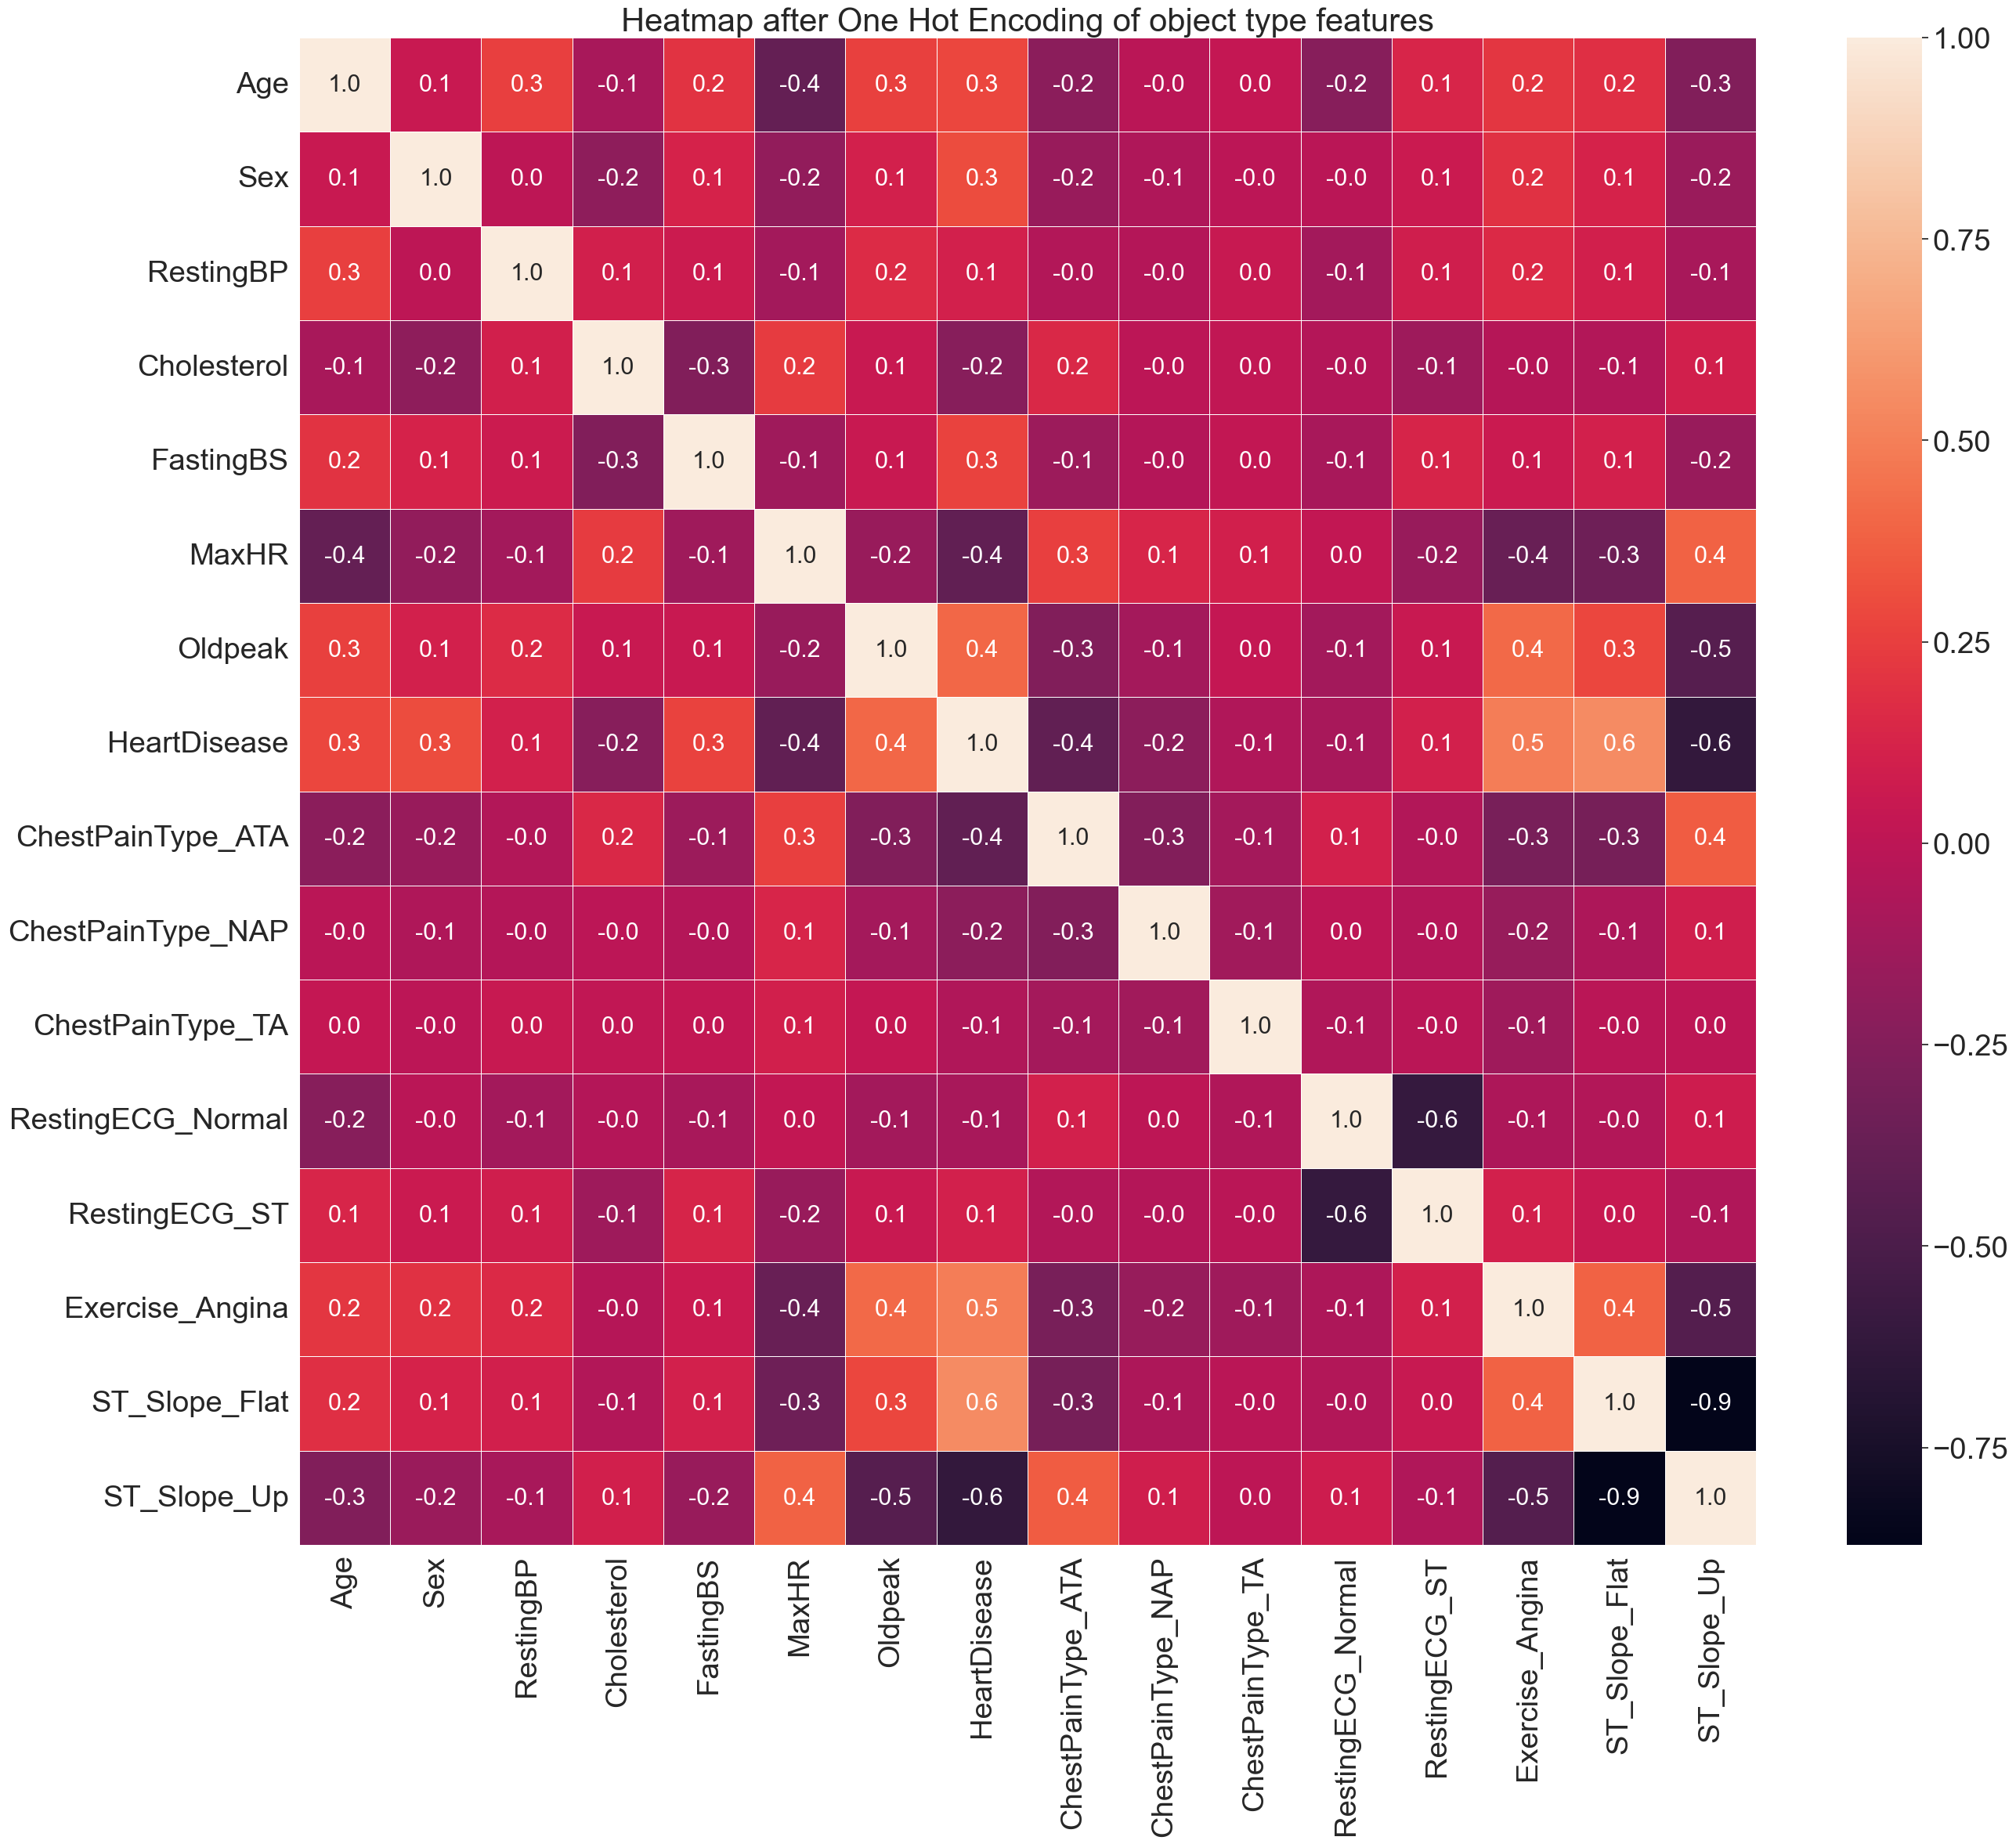

In [44]:
final_df_correlation=final_df.corr()
plt.figure(figsize=(30,25))
sns.set(font_scale=2.5)
plt.title('Heatmap after One Hot Encoding of object type features')
sns.heatmap(final_df_correlation,annot=True,fmt=".1f",linewidth=.5,annot_kws={"size":22})

# Machiene Learning Model

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install shap
import shap
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [46]:
#feature_cols=['Age','Sex','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_Normal','RestingECG_ST','Exercise_Angina','ST_Slope_Flat','ST_Slope_Up']
X=final_df.drop(columns='HeartDisease',axis=1)
y=final_df['HeartDisease']

In [47]:
print(X)
print(y)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0     40    1        140          289          0    172      0.0   
1     49    0        160          180          0    156      1.0   
2     37    1        130          283          0     98      0.0   
3     48    0        138          214          0    108      1.5   
4     54    1        150          195          0    122      0.0   
..   ...  ...        ...          ...        ...    ...      ...   
913   45    1        110          264          0    132      1.2   
914   68    1        144          193          1    141      3.4   
915   57    1        130          131          0    115      1.2   
916   57    0        130          236          0    174      0.0   
917   38    1        138          175          0    173      0.0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                    1                  0                 0   
1                    0                  1                

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [49]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((734, 15), (184, 15), (734,), (184,))

In [50]:
scale=MinMaxScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Searching for the Best Suitable Algorithm

In [51]:
logistic_reg=LogisticRegression()
decision_tree = DecisionTreeClassifier()
svm = SVC(probability=True)

from sklearn.metrics import precision_score, recall_score, f1_score

Accuracy test

In [52]:
algo=['Logistic Reg.', 'SupportVector','KNearestNeigh','Decision Tree']
accu=['87.68%','85.87%','85.51%','77.17%']
log_loss=['4.44','5.09','5.22','8.23']
print("Algorithm Rank"," "*6,"Accuracy"," ","Log Loss")
print("="*40)
for i in range(0,len(algo)):
    print(i+1,".",algo[i]+ " "*5+"|"+accu[i]+ " "*3+"|" +log_loss[i])

Algorithm Rank        Accuracy   Log Loss
1 . Logistic Reg.     |87.68%   |4.44
2 . SupportVector     |85.87%   |5.09
3 . KNearestNeigh     |85.51%   |5.22
4 . Decision Tree     |77.17%   |8.23


# Logistic Regression

In [53]:

logistic_reg.fit(X_train,Y_train)
lr_pred = logistic_reg.predict(X_test)

print('Classification Report of Logistic Regression:\n')
print(classification_report(Y_test,lr_pred))

Classification Report of Logistic Regression:

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

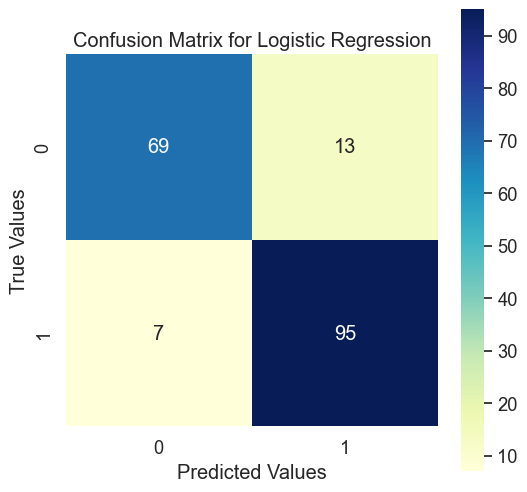

In [54]:

lr_cm = confusion_matrix(Y_test,lr_pred)


plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='YlGnBu', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])

plt.xlabel('Predicted Values') 
plt.ylabel('True Values') 
plt.title('Confusion Matrix for Logistic Regression') 

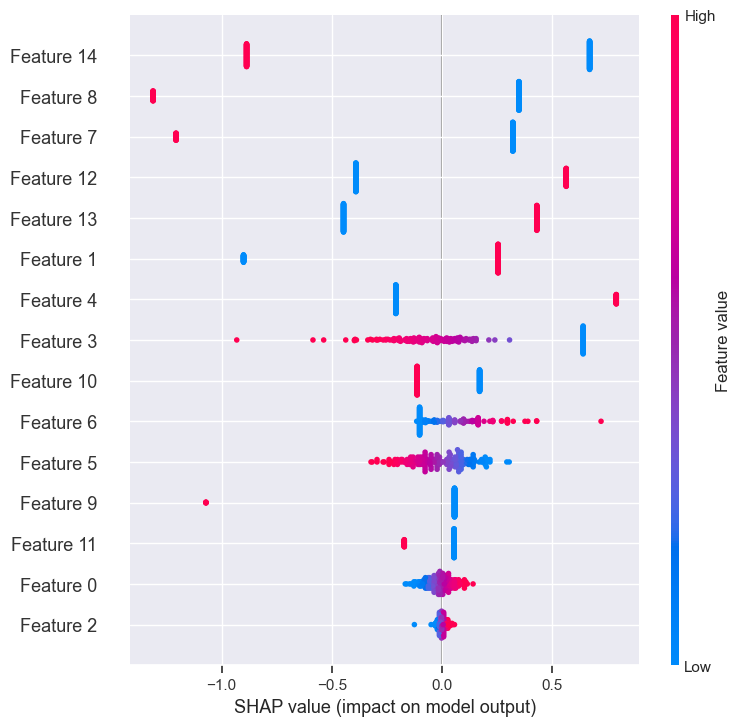

In [55]:

plt.figure(figsize=(12,8))
masker = shap.maskers.Independent(data = X_train)
explainer_of_dtc = shap.LinearExplainer(logistic_reg,masker=masker)
shap_value = explainer_of_dtc.shap_values(X_test)
shap.summary_plot(shap_value,X_test)

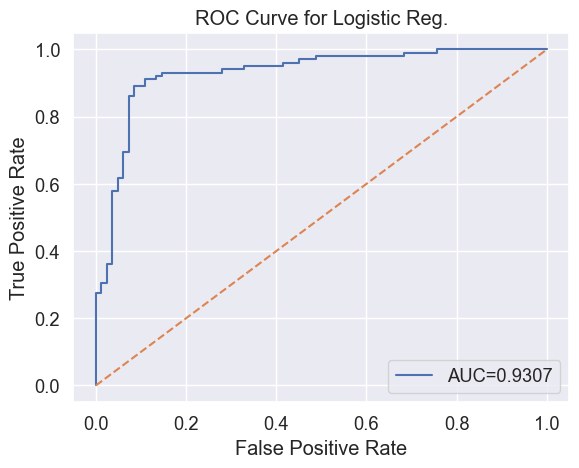

In [56]:


lr_pred_prob = logistic_reg.predict_proba(X_test)[:][:,1]

lr_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(lr_pred_prob,columns=['y pred prob'])],axis=1)
lr_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])
auc = roc_auc_score(lr_actual_predict['y actual'],lr_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Reg.')
plt.legend()

In [57]:
lr_acc_score = accuracy_score(Y_test, lr_pred)
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(Y_test,lr_pred))

Accuracy of Logistic Regression: 89.13043478260869 

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        82
           1       0.88      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



# Support Machine Vector

In [58]:

svm.fit(X_train,Y_train)

svm_pred = svm.predict(X_test)


print('Classification Report of SVM:\n')
print(classification_report(Y_test,svm_pred))

Classification Report of SVM:

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



Text(0.5, 1.0, 'Confusion Matrix for SVM')

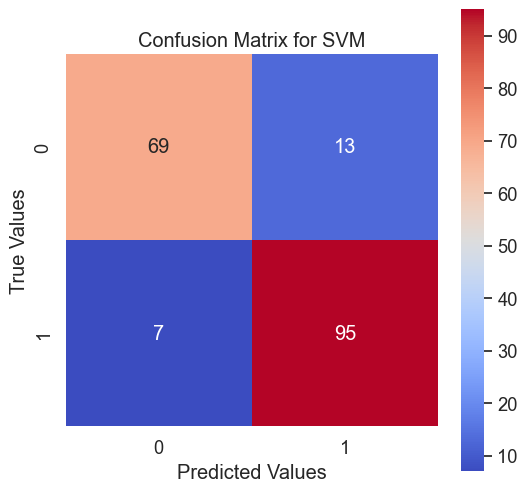

In [59]:

svm_cm = confusion_matrix(Y_test,lr_pred)


plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)


sns.heatmap(svm_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])
plt.xlabel('Predicted Values') 
plt.ylabel('True Values') 
plt.title('Confusion Matrix for SVM')

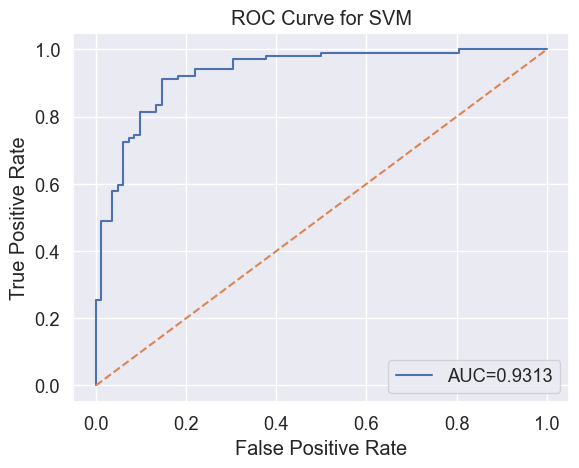

In [60]:

svm_pred_prob = svm.predict_proba(X_test)[:][:,1]

svm_actual_predict = pd.concat([pd.DataFrame(np.array(Y_test),columns=['y actual']),
                               pd.DataFrame(svm_pred_prob,columns=['y pred prob'])],axis=1)
svm_actual_predict.index = Y_test.index

fpr, tpr, tr = roc_curve(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])
auc = roc_auc_score(svm_actual_predict['y actual'],svm_actual_predict['y pred prob'])

plt.plot(fpr,tpr, label='AUC=%.4f'%auc)
plt.plot(fpr,fpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()

In [61]:
svc_acc_score = accuracy_score(Y_test, svm_pred)
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(Y_test,svm_pred))

Accuracy of Support Vector Classifier: 87.5 

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        82
           1       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



# KNearest Neighbors

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'RestingBP'}>],
       [<Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>],
       [<Axes: title={'center': 'ExerciseAngina'}>,
        <Axes: title={'center': 'Oldpeak'}>,
        <Axes: title={'center': 'HeartDisease'}>]], dtype=object)

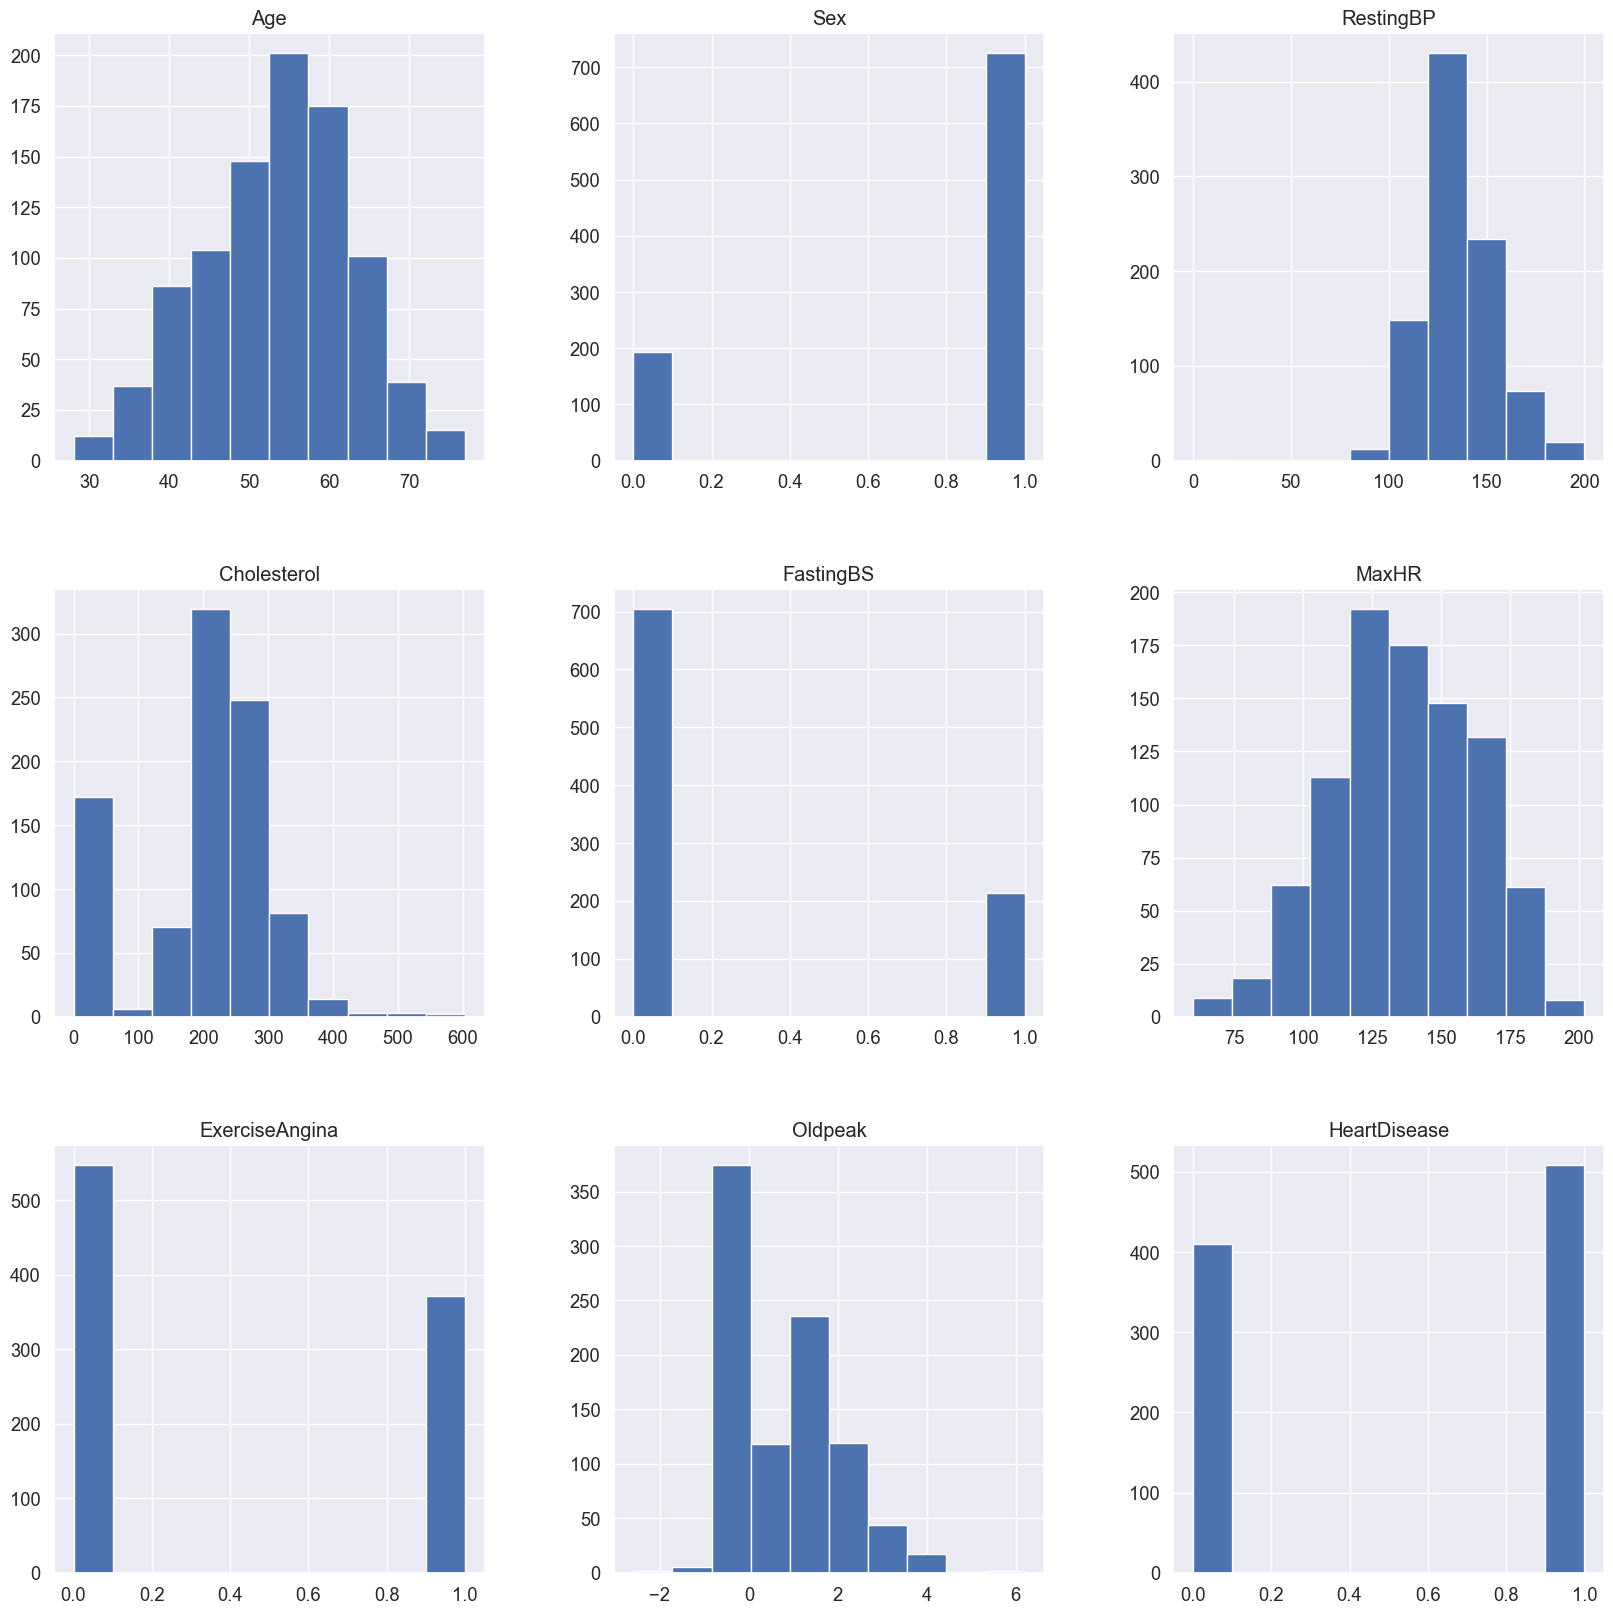

In [62]:
df_heart.hist(figsize=(20,20))

<Axes: xlabel='HeartDisease', ylabel='count'>

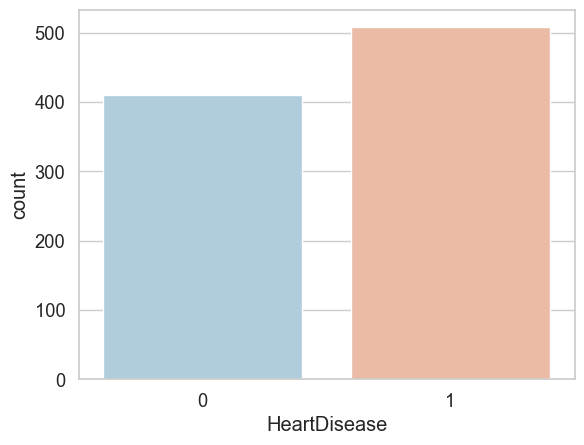

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='HeartDisease',data=df_heart,palette='RdBu_r')

In [64]:
feature_cols = ['Cholesterol','MaxHR','Oldpeak']
X = final_df[feature_cols]
y = final_df['HeartDisease']

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

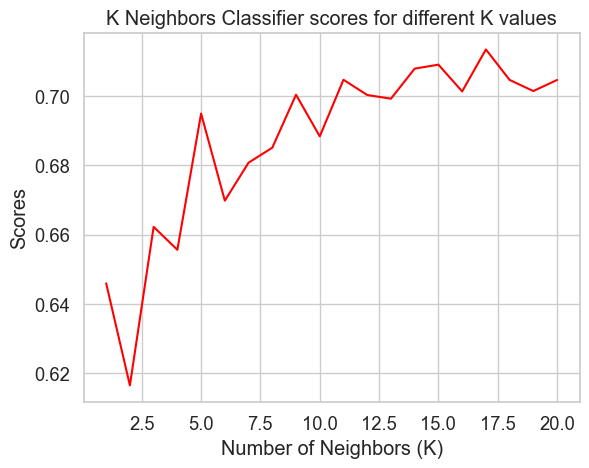

In [65]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

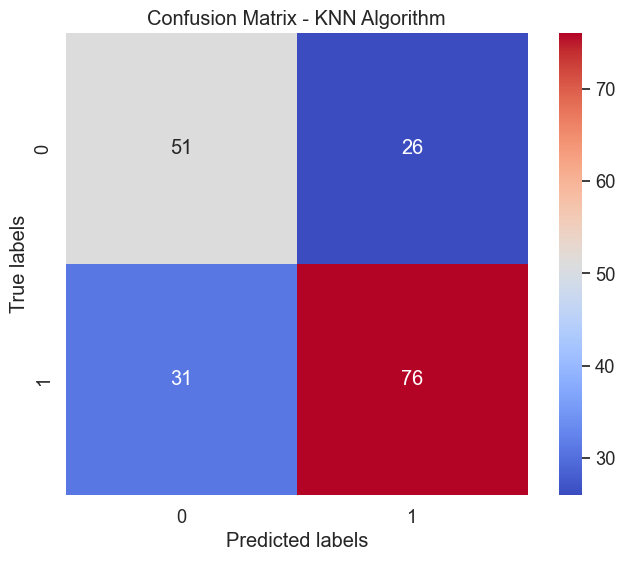

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 17  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


knn_pred = knn.predict(X_test)


knn_cm = confusion_matrix(y_test, knn_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='coolwarm', square=True,xticklabels=['0', '1'],yticklabels=['0', '1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN Algorithm')
plt.show()


In [67]:
knn_acc_score = accuracy_score(y_test, knn_pred)
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_pred))

Accuracy of K-NeighborsClassifier: 69.02173913043478 

              precision    recall  f1-score   support

           0       0.62      0.66      0.64        77
           1       0.75      0.71      0.73       107

    accuracy                           0.69       184
   macro avg       0.68      0.69      0.68       184
weighted avg       0.69      0.69      0.69       184



# COMPARE ALL MODELS

In [68]:

cm_models = [lr_cm,svm_cm,knn_cm]
cm_model = ['Logistic Regs.','Random Forest','SVM','KNNeighbor']
# making a for loop
for i,j in zip(cm_models,cm_model):
    print(j,'Confusion Matrix:\n')
    print(i)
    print('='*30)

Logistic Regs. Confusion Matrix:

[[69 13]
 [ 7 95]]
Random Forest Confusion Matrix:

[[69 13]
 [ 7 95]]
SVM Confusion Matrix:

[[51 26]
 [31 76]]


# f1 score

In [69]:
classifiers = {
    'Logistic Regression': logistic_reg,
    'Decision Tree': decision_tree,
    'KN nearest': knn,
    'Support Vector Machine': svm
}


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Metrics for {name}:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print()

Metrics for Logistic Regression:
Precision: 0.7294
Recall: 0.7228
F1-score: 0.7244

Metrics for Decision Tree:
Precision: 0.6470
Recall: 0.6359
F1-score: 0.6383

Metrics for KN nearest:
Precision: 0.6936
Recall: 0.6902
F1-score: 0.6914

Metrics for Support Vector Machine:
Precision: 0.6890
Recall: 0.6848
F1-score: 0.6861



# classification Report

In [70]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                    'K-Nearest Neighbour','Support Vector Machine'], 'Accuracy': [lr_acc_score,
                    knn_acc_score,svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.891304
1,K-Nearest Neighbour,0.690217
2,Support Vector Machine,0.875000


# Logistic Regression Tuning

In [71]:
from sklearn.model_selection import  GridSearchCV
logistic_reg=LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print(f'Best hyperparameters: {grid_search.best_params_}')

print("Best model parameters:")
print(best_model.get_params())

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')
print(X_test.shape)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Best hyperparameters: {'C': 1}
Best model parameters:
{'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Cross-validation scores: [0.70108696 0.69565217 0.73369565 0.76502732 0.68852459]
Mean cross-validation score: 0.7167973390354003
(184, 3)
Test set accuracy: 0.7228260869565217
              precision    recall  f1-score   support

           0       0.65      0.73      0.69        77
           1       0.79      0.72      0.75       107

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184



In [72]:
X_test

,Cholesterol,MaxHR,Oldpeak
668,195,179,0.0
30,518,130,0.0
377,0,122,1.2
535,0,122,1.0
807,309,156,0.0
...,...,...,...
211,288,140,0.0
745,269,169,1.8
584,244,116,1.5
878,266,171,0.6


In [73]:
final_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,Exercise_Angina,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0.0,0,1,0,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,1,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,1,0,1,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,1,0,0,0,1


In [74]:
num_features=len(best_model.coef_.flatten())
print(num_features)

3


In [75]:
input_data=(289,172,0.0)
input_dta_arr=np.asarray(input_data)
input_data_reshaped=input_dta_arr.reshape(1,-1)
prediction=best_model.predict(input_data_reshaped)
if(prediction[0]==1):
    print("Person has a high chance of Heart Disease")
else:
    print("Person has a low chance of have heart Disease")

Person has a low chance of have heart Disease


In [76]:
input_data=(195,122,1.0)
input_dta_arr=np.asarray(input_data)
input_data_reshaped=input_dta_arr.reshape(1,-1)
prediction=best_model.predict(input_data_reshaped)
if(prediction[0]==1):
    print("Person has a high chance of Heart Disease")
else:
    print("Person has a low chance of heart Disease")

Person has a high chance of Heart Disease


In [77]:
import pickle
pickle.dump(best_model, open("heart_model_1.pkl", "wb"))

In [78]:
loaded_model = pickle.load(open("heart_model_1.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7228260869565217